In [1]:
import os

import geopandas as gpd
import pandas as pd
import numpy as np
import momepy as mm
import networkx as nx

from sqlalchemy import create_engine

import matplotlib.pyplot as plt

user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(url)

In [2]:
def pgselect(table, buffer=10000, x=338250, y=392250):
    sql = f'''
    SELECT * FROM {table} 
    WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'''
    return gpd.read_postgis(sql, engine, geom_col='geometry')

In [8]:
enclosures = pgselect('enclosures', 10**6, x=515000, y=210000)

In [9]:
from mapclassify import greedy

In [10]:
enclosures['colors'] = greedy(enclosures)

<AxesSubplot:>

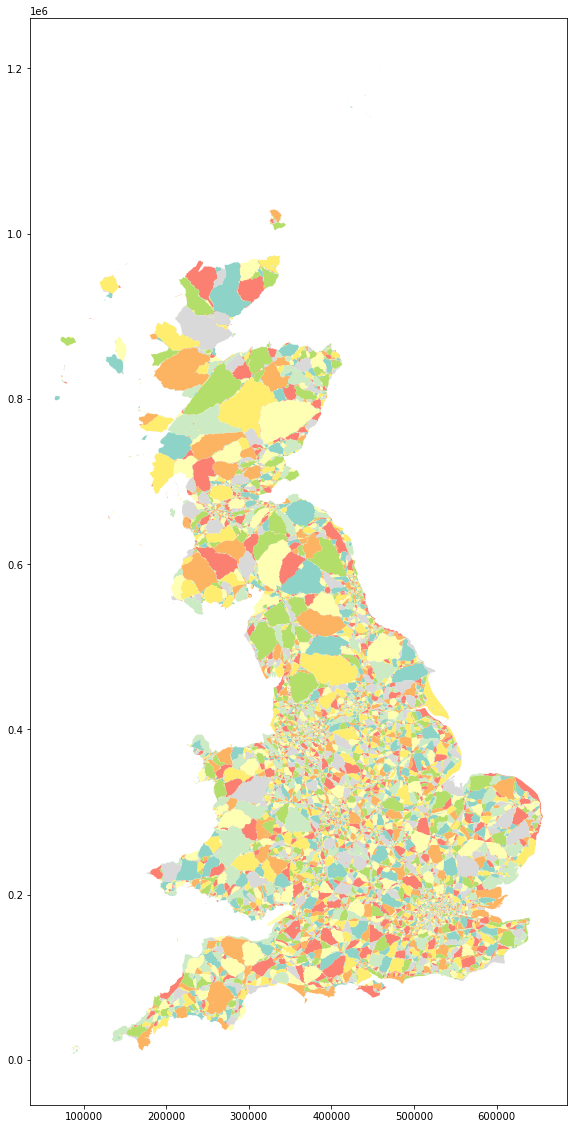

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
enclosures.plot('colors', ax=ax, cmap='Set3')

In [12]:
enclosures.head()

,geometry,colors
0,"POLYGON Z ((84014.170 5445.450 0.000, 84021.58...",1
1,"POLYGON Z ((84130.270 5527.060 0.000, 84129.38...",3
2,"POLYGON Z ((84962.640 5512.640 0.000, 84973.84...",4
3,"POLYGON Z ((84462.190 5742.340 0.000, 84464.64...",5
4,"POLYGON Z ((84788.800 5745.140 0.000, 84794.64...",6
